In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import re
import string 
from nltk.tokenize import TweetTokenizer 
from nltk.corpus import stopwords

In [3]:
df = pd.read_csv("EuropeanElection2019_EN.csv")

In [4]:
df.head()

,id,country,time_stamp,lang,text
0,1126171395703152640,NaN,Wed May 08 17:05:58 +0000 2019,en,Facebook now allows EU-wide political campaign...
1,1126171374169538561,NaN,Wed May 08 17:05:53 +0000 2019,nl,.@HansBrusselmans is een ding nu. Heeft Twitte...
2,1126171328195829761,NaN,Wed May 08 17:05:42 +0000 2019,de,RT @VolkerRahn: Protestantische Partnerkirchen...
3,1126171318204940293,NaN,Wed May 08 17:05:40 +0000 2019,en,RT @TommySheppard: Truth is it doesn't matter ...
4,1126171305047416833,NaN,Wed May 08 17:05:37 +0000 2019,fr,@bbclaurak Vote @brexitparty_uk! 🥳 #ForDemocr...


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363922 entries, 0 to 442729
Data columns (total 9 columns):
id            363922 non-null object
country       3245 non-null object
time_stamp    363922 non-null object
lang          363922 non-null object
text          363922 non-null object
length        363922 non-null int64
TimeStamp     363921 non-null datetime64[ns, UTC]
Date          363921 non-null object
is_retweet    363922 non-null bool
dtypes: bool(1), datetime64[ns, UTC](1), int64(1), object(6)
memory usage: 25.3+ MB


In [28]:
len(df)

363922

In [23]:
from pandas import DataFrame 
df = DataFrame.drop_duplicates(df)

In [27]:
len(df)

363922

In [88]:
tweets_by_country = df['country'].value_counts()
tweets_by_country.head(10)

United Kingdom     1700
Belgium             356
Ireland             264
Germany             186
The Netherlands     104
France               93
Spain                92
Italy                80
Finland              36
Cyprus               31
Name: country, dtype: int64

In [89]:
tweets_by_lang = df['lang'].value_counts()
tweets_by_lang.head(10)

en     332739
fr       6213
und      5650
de       4047
es       3847
el       2360
nl       2288
it       2124
ca       1459
pl        484
Name: lang, dtype: int64

In [90]:
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,text,counts
51995,RT @GretaThunberg: The top 5 most important is...,11700
51073,RT @Femi_Sorry: THREAD of things about Nigel F...,4020
56952,RT @PartisanDE: More evidence how inhuman #Mac...,3569
51236,RT @FollowPolitics_: POLL | Who are you planni...,2388
51080,RT @Femi_Sorry: Watch this.\nRe-watch this.\nA...,2065
56506,RT @OFOCBrexit: Every time Nigel Farage tells ...,1896
65895,RT @guyverhofstadt: Johnson &amp; Farage delib...,1799
65884,RT @guyverhofstadt: At these European Election...,1490
65888,RT @guyverhofstadt: Congratulations to the @Li...,1490
69140,RT @remainvoter: Join #RemainVoter. It's not ...,1417


In [91]:
df['length'] = df['text'].apply(len)
df.head()

,id,country,time_stamp,lang,text,length,TimeStamp,Date,is_retweet,retweeted,mentioned,hashtags,top
0,1126171395703152640,NaN,Wed May 08 17:05:58 +0000 2019,en,Facebook now allows EU-wide political campaign...,215,2019-05-08 17:05:58+00:00,2019-05-08,False,[],[],[#EUelections2019],0
1,1126171374169538561,NaN,Wed May 08 17:05:53 +0000 2019,nl,.@HansBrusselmans is een ding nu. Heeft Twitte...,167,2019-05-08 17:05:53+00:00,2019-05-08,False,[],"[@HansBrusselmans, @SPnl]",[#EUelections2019],0
2,1126171328195829761,NaN,Wed May 08 17:05:42 +0000 2019,de,RT @VolkerRahn: Protestantische Partnerkirchen...,142,2019-05-08 17:05:42+00:00,2019-05-08,True,[@VolkerRahn],[@ekhn_de],"[#Europa, #Europawahl2019]",0
3,1126171318204940293,NaN,Wed May 08 17:05:40 +0000 2019,en,RT @TommySheppard: Truth is it doesn't matter ...,141,2019-05-08 17:05:40+00:00,2019-05-08,True,[@TommySheppard],[],[],0
4,1126171305047416833,NaN,Wed May 08 17:05:37 +0000 2019,fr,@bbclaurak Vote @brexitparty_uk! 🥳 #ForDemocr...,94,2019-05-08 17:05:37+00:00,2019-05-08,False,[],"[@bbclaurak, @brexitparty_uk]","[#ForDemocracy, #EUelections2019]",0


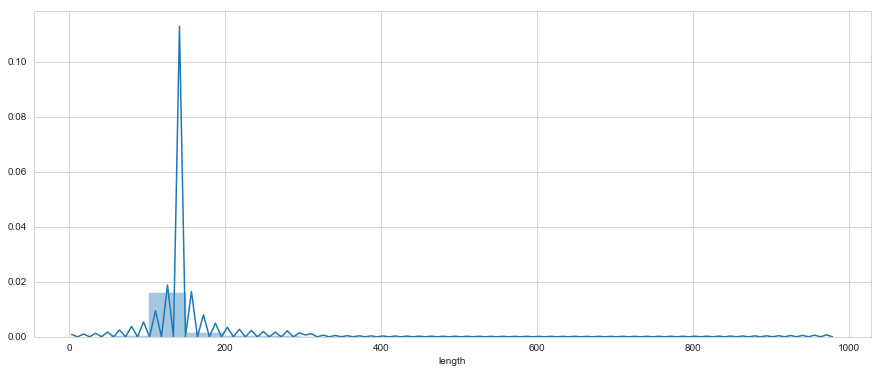

In [92]:
plt.figure(figsize=(15,6))
sns.distplot(df['length'], bins=20)

In [93]:
df["TimeStamp"] = pd.to_datetime(df["time_stamp"], errors='coerce')
df.drop("time_stamp", axis=1).head()

,id,country,lang,text,length,TimeStamp,Date,is_retweet,retweeted,mentioned,hashtags,top
0,1126171395703152640,NaN,en,Facebook now allows EU-wide political campaign...,215,2019-05-08 17:05:58+00:00,2019-05-08,False,[],[],[#EUelections2019],0
1,1126171374169538561,NaN,nl,.@HansBrusselmans is een ding nu. Heeft Twitte...,167,2019-05-08 17:05:53+00:00,2019-05-08,False,[],"[@HansBrusselmans, @SPnl]",[#EUelections2019],0
2,1126171328195829761,NaN,de,RT @VolkerRahn: Protestantische Partnerkirchen...,142,2019-05-08 17:05:42+00:00,2019-05-08,True,[@VolkerRahn],[@ekhn_de],"[#Europa, #Europawahl2019]",0
3,1126171318204940293,NaN,en,RT @TommySheppard: Truth is it doesn't matter ...,141,2019-05-08 17:05:40+00:00,2019-05-08,True,[@TommySheppard],[],[],0
4,1126171305047416833,NaN,fr,@bbclaurak Vote @brexitparty_uk! 🥳 #ForDemocr...,94,2019-05-08 17:05:37+00:00,2019-05-08,False,[],"[@bbclaurak, @brexitparty_uk]","[#ForDemocracy, #EUelections2019]",0


In [94]:
df['Date'] = df['TimeStamp'].apply(lambda t: t.date())
df.head()

,id,country,time_stamp,lang,text,length,TimeStamp,Date,is_retweet,retweeted,mentioned,hashtags,top
0,1126171395703152640,NaN,Wed May 08 17:05:58 +0000 2019,en,Facebook now allows EU-wide political campaign...,215,2019-05-08 17:05:58+00:00,2019-05-08,False,[],[],[#EUelections2019],0
1,1126171374169538561,NaN,Wed May 08 17:05:53 +0000 2019,nl,.@HansBrusselmans is een ding nu. Heeft Twitte...,167,2019-05-08 17:05:53+00:00,2019-05-08,False,[],"[@HansBrusselmans, @SPnl]",[#EUelections2019],0
2,1126171328195829761,NaN,Wed May 08 17:05:42 +0000 2019,de,RT @VolkerRahn: Protestantische Partnerkirchen...,142,2019-05-08 17:05:42+00:00,2019-05-08,True,[@VolkerRahn],[@ekhn_de],"[#Europa, #Europawahl2019]",0
3,1126171318204940293,NaN,Wed May 08 17:05:40 +0000 2019,en,RT @TommySheppard: Truth is it doesn't matter ...,141,2019-05-08 17:05:40+00:00,2019-05-08,True,[@TommySheppard],[],[],0
4,1126171305047416833,NaN,Wed May 08 17:05:37 +0000 2019,fr,@bbclaurak Vote @brexitparty_uk! 🥳 #ForDemocr...,94,2019-05-08 17:05:37+00:00,2019-05-08,False,[],"[@bbclaurak, @brexitparty_uk]","[#ForDemocracy, #EUelections2019]",0


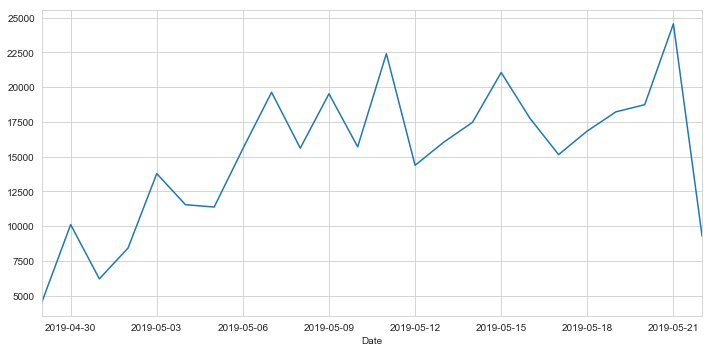

In [96]:
plt.figure(figsize=(10,5))
df.groupby('Date').count()["text"].plot()
plt.tight_layout()

In [97]:
dates = df.groupby('Date').count()["text"]
dates.to_csv("dates.csv", sep=';', header=False, encoding = 'utf-8')

In [35]:
df['is_retweet'] = df['text'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets

303124

In [36]:
df.loc[df['is_retweet']].text.unique().size

27372

In [47]:
# 10 most repeated tweets
df.groupby(['text']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,text,counts
51995,RT @GretaThunberg: The top 5 most important is...,11700
51073,RT @Femi_Sorry: THREAD of things about Nigel F...,4020
56952,RT @PartisanDE: More evidence how inhuman #Mac...,3569
51236,RT @FollowPolitics_: POLL | Who are you planni...,2388
51080,RT @Femi_Sorry: Watch this.\nRe-watch this.\nA...,2065
56506,RT @OFOCBrexit: Every time Nigel Farage tells ...,1896
65895,RT @guyverhofstadt: Johnson &amp; Farage delib...,1799
65884,RT @guyverhofstadt: At these European Election...,1490
65888,RT @guyverhofstadt: Congratulations to the @Li...,1490
69140,RT @remainvoter: Join #RemainVoter. It's not ...,1417


In [98]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

In [99]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.text.apply(find_retweeted)
df['mentioned'] = df.text.apply(find_mentioned)
df['hashtags'] = df.text.apply(find_hashtags)

In [100]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [101]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame([hashtag for hashtags_list in hashtags_list_df.hashtags for hashtag in hashtags_list], columns=['hashtag'])

In [102]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

20505

In [103]:
#count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [105]:
popular_hashtags[:21]

,hashtag,counts
0,#EUelections2019,118452
1,#EUElections2019,34660
2,#EuropeanElections2019,30371
3,#Brexit,11742
4,#EU,10180
5,#StopBrexit,9073
6,#PeoplesVote,6360
7,#Macron,5537
8,#BrexitParty,5358
9,#ThisTimeImVoting,5341


In [107]:
popular_hashtags.to_csv("top10hashtags.csv", sep=';', header=False, encoding = 'utf-8')

In [108]:
# take hashtags which appear at least this amount of times
min_appearance = 2670
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [109]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [110]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [111]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

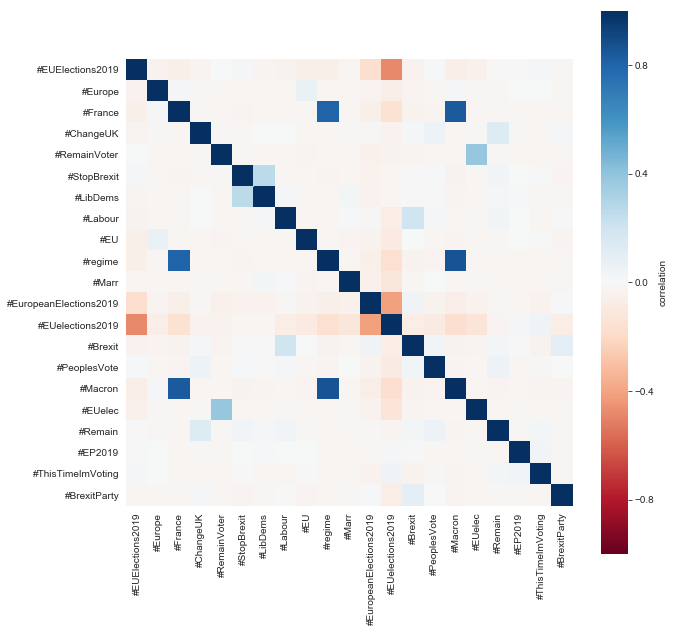

In [112]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})

In [113]:
# take the rows from the mentioned columns where there are actually mentions
mentioned_list_df = df.loc[
                       df.mentioned.apply(
                           lambda mentioned_list: mentioned_list !=[]
                       ),['mentioned']]

In [114]:
# create dataframe where each use of hashtag gets its own row
mentioned_df = pd.DataFrame([mentioned for mentioned_list in mentioned_list_df.mentioned for mentioned in mentioned_list], columns=['mentioned'])

In [115]:
mentioned_df['mentioned'].unique().size

18149

In [116]:
#count of appearances of each hashtag mentioned
popular_mentioned = mentioned_df.groupby('mentioned').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

In [117]:
popular_mentioned[:21]

,mentioned,counts
0,@LibDems,15399
1,@UKLabour,6199
2,@brexitparty_uk,4834
3,@TheGreenParty,4288
4,@Nigel_Farage,4115
5,@theSNP,3755
6,@vincecable,3223
7,@jeremycorbyn,2344
8,@KRLS,2032
9,@guyverhofstadt,1821


In [ ]:
popular_hashtags.to_csv("top10hashtags.csv", sep=';', header=False, encoding = 'utf-8')

In [60]:
# take hashtags which appear at least this amount of times
min_appearance = 1055
# find popular hashtags - make into python set for efficiency
popular_mentioned_set = set(popular_mentioned[
                           popular_mentioned.counts>=min_appearance
                           ]['mentioned'])

In [61]:
# make a new column with only the popular hashtags
mentioned_list_df['popular_mentioned'] = mentioned_list_df.mentioned.apply(
            lambda mentioned_list: [mentioned for mentioned in mentioned_list
                                  if mentioned in popular_mentioned_set])
# drop rows without popular hashtag
popular_mentioned_list_df = mentioned_list_df.loc[
            mentioned_list_df.popular_mentioned.apply(lambda mentioned_list: mentioned_list !=[])]

In [62]:
# make new dataframe
mentioned_vector_df = popular_mentioned_list_df.loc[:, ['popular_mentioned']]

for mentioned in popular_mentioned_set:
    # make columns to encode presence of hashtags
    mentioned_vector_df['{}'.format(mentioned)] = mentioned_vector_df.popular_mentioned.apply(
        lambda mentioned_list: int(mentioned in mentioned_list))

In [63]:
mentioned_matrix = mentioned_vector_df.drop('popular_mentioned', axis=1)

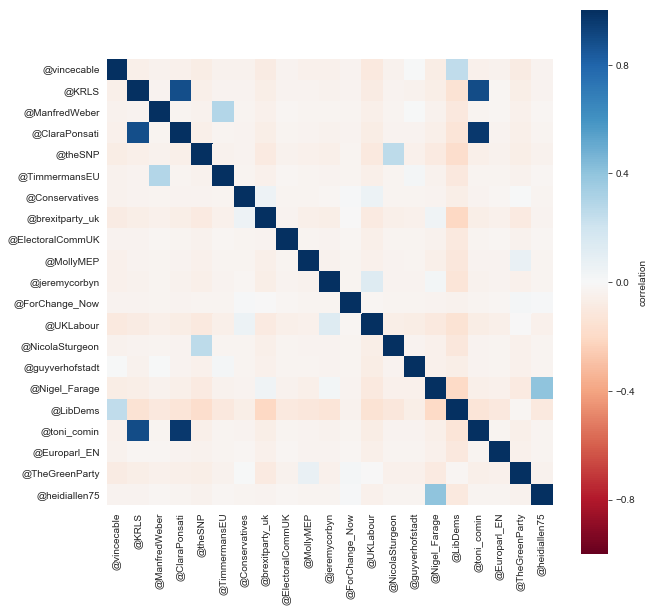

In [64]:
# calculate the correlation matrix
correlations = mentioned_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})

In [65]:
def process(text, tokenizer=TweetTokenizer()): 
  """Process the text of a tweet: 
  - Lowercase 
  - Tokenize 
  - Stopword removal 
  - Digits removal 
 
  Return: list of strings 
  """
  decoded_text = text.decode('utf-8')
  text = decoded_text.lower()
  tokens = tokenizer.tokenize(text)
  punct = list(string.punctuation) 
  stopword_list = stopwords.words('english') + punct
  return [tok for tok in tokens if tok not in stopword_list and not  
          tok.isdigit() and not tok.startswith(('#', '@', 'https')) and len(tok) > 3]

In [66]:
tweet_tokenizer = TweetTokenizer()

In [67]:
text_filtered = df[df["lang"] == "en"]
text_filtered["text"].iloc[0]

'Facebook now allows EU-wide political campaign ads for the European Parliament and EU political groups. Two EP insiders said their ads/ad tests were authorized across Europe. #EUelections2019 https://t.co/NjtD6idd3c'

In [68]:
english_text = (text_filtered["text"]).apply(process)
english_text_blob = [' '.join(x) for x in english_text]
english_text_blob[:5]

[u'facebook allows eu-wide political campaign european parliament political groups insiders said tests authorized across europe',
 u'truth matter many times people scotland demand right choose independence secretary',
 u'stop farage becoming face britain back supporting party find whic',
 u'year span hearings content warning exposed many paedophiles',
 u'postal votes start come letter help wipe smile face choice']

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [56]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(english_text_blob)

In [57]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=1, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :20]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:  vote  european  make  register  voting  elections  23rd  sure  poll  citizens  pro  party  planning  thursday  want  ahead  last  remain  europeans  parties
Cluster 1:  climate  breakdown  ecologic  ecological  issues  important  gretathunberg  forget  brea  acting  decades  breakdo  tweet  outranks  unhabitatyouth  chrissy  brexit  thanks  thunberg  greta
Cluster 2:  brexit  farage  people  party  nigel  ahead  remain  europe  european  labour  vote  candidates  evidence  today  want  time  voting  public  disabled  things


In [73]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return 1
    return 0

In [84]:
df['top'] = df['text'].apply(lambda tweet: word_in_text('RT @GretaThunberg: The top 5 most important ', tweet))